# Getting Data

In [5]:
#!kaggle competitions download -c store-sales-time-series-forecasting

In [35]:
# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.time_series.ex5 import *

# Setup notebook
from pathlib import Path
from learntools.time_series.style import *  # plot style settings
from learntools.time_series.utils import plot_periodogram, seasonal_plot

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from xgboost import XGBRegressor

In [7]:
data=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv", 
                 parse_dates=['date'], 
                 infer_datetime_format=True,)
print(data.shape)
data.head()

(3000888, 6)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [8]:
data.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [9]:
data['family'].nunique()

33

In [10]:
submit=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv", parse_dates=['date'], index_col=['date'])
submit.head()

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0


In [11]:
submit_sample=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv")
submit_sample.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [12]:
stores=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
print(stores.shape)
stores.head()

(54, 5)


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [13]:
oil=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv", parse_dates=['date'], index_col=['date'])
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [14]:
holidays_events=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv",parse_dates=['date'], index_col=['date'])
holidays_events.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [15]:
transactions=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv",parse_dates=['date'], index_col=['date'])
transactions.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


# Missing Values

In [16]:
data.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [17]:
stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [18]:
oil.isna().sum()

dcoilwtico    43
dtype: int64

In [19]:
oil[oil['dcoilwtico'].isna()]

,dcoilwtico
date,
2013-01-01,NaN
2013-01-21,NaN
2013-02-18,NaN
2013-03-29,NaN
2013-05-27,NaN
2013-07-04,NaN
2013-09-02,NaN
2013-11-28,NaN
2013-12-25,NaN


random values are missing. there are no values missing for a consecutive group of days. therefore, it is okay to replace each missing value with previous value. first value on index 0 can be filled by value at index 1

In [20]:
oil=oil.fillna(method="ffill")
oil=oil.fillna(method="bfill") #for 1st row

In [21]:
oil.isna().sum()

dcoilwtico    0
dtype: int64

In [22]:
holidays_events.isna().sum()

type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

# Trend

In [23]:
store_sales = data.set_index('date').to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
store_sales.head()

id  sales  onpromotion
date       store_nbr family                            
2013-01-01 1         AUTOMOTIVE   0    0.0            0
                     BABY CARE    1    0.0            0
                     BEAUTY       2    0.0            0
                     BEVERAGES    3    0.0            0
                     BOOKS        4    0.0            0

In [24]:
average_sales = store_sales.groupby('date').mean()['sales']
average_sales.head()

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
Freq: D, Name: sales, dtype: float64

<AxesSubplot:title={'center':'Average Sales'}, xlabel='date'>

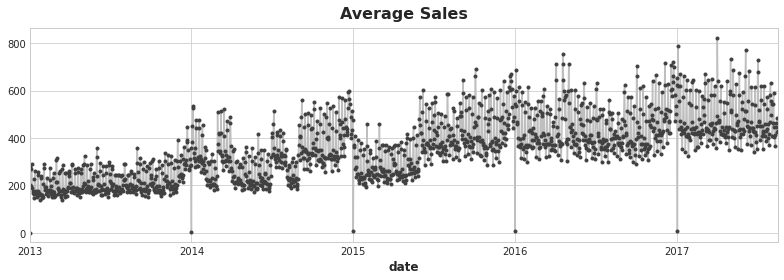

In [25]:
average_sales.plot(title="Average Sales", **plot_params)

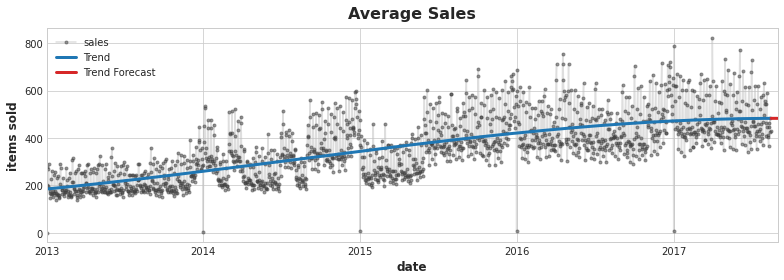

In [26]:
y = average_sales.copy()  # the target
y.index

dp = DeterministicProcess(
    index=y.index,  # dates from the training data
    order=3,             # the time dummy (trend)
)

# YOUR CODE HERE: Create the feature set for the dates given in y.index
X = dp.in_sample()

# Create features for a 16-day forecast.
X_fore = dp.out_of_sample(steps=16)

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();

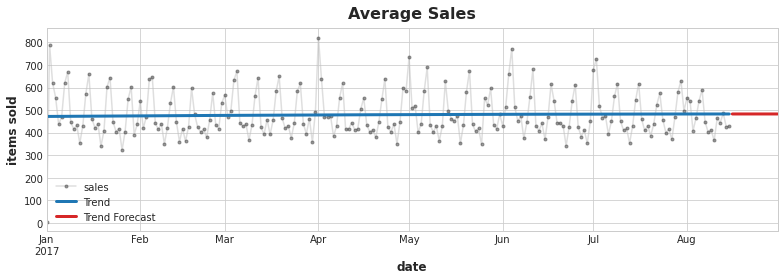

In [27]:
ax = y['2017'].plot(**plot_params, alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred['2017'].plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore['2017'].plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();

It appears that trend for our forecast can be ignored as it is a straight line

# Seasonality

<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

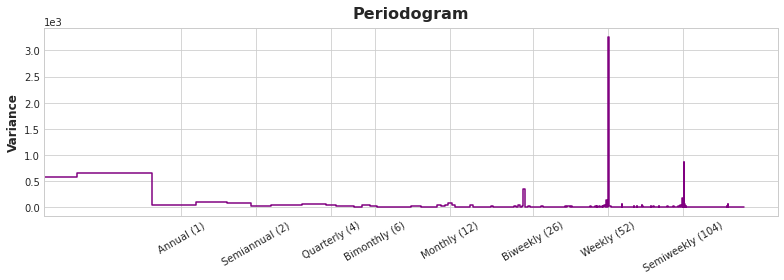

In [33]:
plot_periodogram(average_sales.loc['2015':'2017'])

In [40]:
y = average_sales.copy()

# YOUR CODE HERE
fourier = CalendarFourier(freq="M", order=4)
dp = DeterministicProcess(
    index=y.index,
    constant=True,
    #order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
X = dp.in_sample()
X.head()

,const,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)","sin(3,freq=M)","cos(3,freq=M)","sin(4,freq=M)","cos(4,freq=M)"
date,,,,,,,,,,,,,,,
2013-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2013-01-02,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.201299,0.979530,0.394356,0.918958,0.571268,0.820763,0.724793,0.688967
2013-01-03,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.394356,0.918958,0.724793,0.688967,0.937752,0.347305,0.998717,-0.050649
2013-01-04,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.571268,0.820763,0.937752,0.347305,0.968077,-0.250653,0.651372,-0.758758
2013-01-05,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.724793,0.688967,0.998717,-0.050649,0.651372,-0.758758,-0.101168,-0.994869
